<a href="https://colab.research.google.com/github/YorkJong/Colab/blob/main/ViStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Visualzing Stock Prices and Volume
References:
* [绘制plotly金融股票图避坑指南——解决k线不连续问题](https://zhuanlan.zhihu.com/p/469985462)
* [Plotly: How to add volume to a candlestick chart](https://stackoverflow.com/questions/64689342/plotly-how-to-add-volume-to-a-candlestick-chart)
* [[Day09]Pandas索引的運用！](https://ithelp.ithome.com.tw/articles/10194006)
* [Plotly: How to apply different titles for each different subplots?](https://stackoverflow.com/questions/58849925/plotly-how-to-apply-different-titles-for-each-different-subplots)
* [Visualizing Historical Stock Prices and Volume from Scratch](https://medium.com/analytics-vidhya/visualizing-historical-stock-price-and-volume-from-scratch-46029b2c5ef9)

In [2]:
!pip install yfinance
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [5]:
import pandas as pd
import yfinance as yf
import pandas as pd
from datetime import datetime

def fetch_eod_data(ticker):
    data = yf.download(ticker, start="2010-01-01", end="2023-01-01")
    #daa = yf.download(ticker, start="2022-06-01")
    return data

# Download Tesla stock data
ticker = "TSLA"
df = yf.Ticker(ticker).history(period="6mo")    # for last 6 month
#df = yf.download(ticker, start="2022-06-01")
#df = yf.download(ticker, start="2021-07-01", end="2022-01-31")
#df = yf.Ticker(ticker).history(period="max")

# Save the data to a CSV file
df.to_csv("tesla_stock.csv")

# Load the data from the file
df = pd.read_csv("tesla_stock.csv", index_col='Date')
df.index.values[:] = [d[:len('YYYY-mm-dd HH:MM:SS')] for d in df.index.values]
print(type(df.index))
#print(df.head())
df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')
#df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H:%M:%S')
print(type(df.index))
#print(df.columns)
df.head()

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-01,301.276672,311.876678,295.000000,297.276672,117042900,0.0,0.0
2022-08-02,294.003326,307.833344,292.666656,300.586670,95577600,0.0,0.0
2022-08-03,305.000000,309.549988,301.149994,307.396667,80091000,0.0,0.0
2022-08-04,311.000000,313.606659,305.000000,308.633331,72256200,0.0,0.0
2022-08-05,302.670013,304.606659,285.543335,288.170013,113172900,0.0,0.0


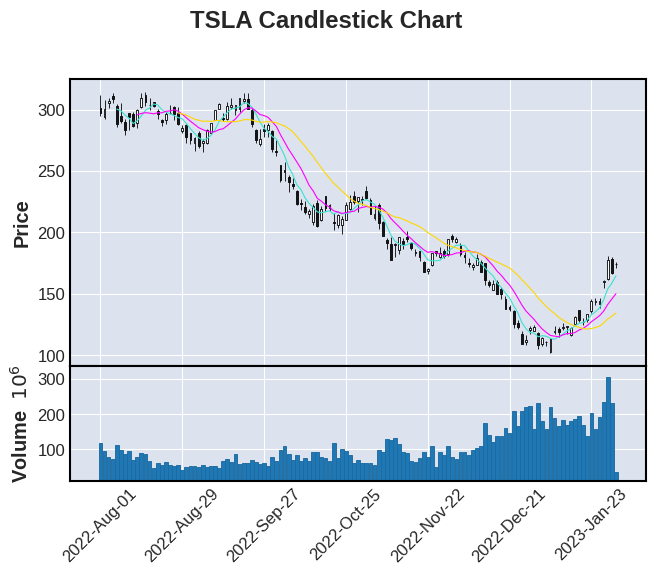

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf

# Download Tesla's stock prices
ticker = "TSLA"
df = yf.Ticker(ticker).history(period="6mo")    # for last 6 month

# Plot a candlestick chart with 5-day, 10-day and 20-day moving averages and volume bar chart
mpf.plot(df, type='candle', mav=(5, 10, 20), volume=True, title=f"{ticker} Candlestick Chart")
plt.show()


In [7]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go

# Download Tesla stock data for the past 6 months
ticker = 'TSLA'
df = yf.Ticker(ticker).history(period="6mo")
#df.reset_index(inplace=True)    # index is 0..N now

# Plot the candlestick chart
candlestick = go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], name='OHLC')
fig = go.Figure(data=[candlestick])

# Plot the moving average lines
for days in [5, 10, 20]:
    df['ma_{}'.format(days)] = df['Close'].rolling(window=days).mean()
    ma = go.Scatter(x=df.index, y=df['ma_{}'.format(days)], name='MA {}'.format(days))
    fig.add_trace(ma)

# Create separate y-axis for volume
volume = go.Bar(x=df.index, y=df['Volume'], name='Volume', yaxis='y2')
fig.add_trace(volume)

# Calculate volume moving average line
df['vma50'] = df['Volume'].rolling(window=50).mean()
vma50 = go.Scatter(x=df.index, y=df['vma50'], yaxis='y2', name='VMA50', line=dict(color='purple'))
fig.add_trace(vma50)

# Remove non-trading dates
df.index = df.index.strftime('%Y-%m-%d')
dt_all = pd.date_range(start=df.index.values[0], end=df.index.values[-1])
dt_all = [d.strftime("%Y-%m-%d") for d in dt_all]
trade_date = [d for d in df.index.values]
dt_breaks = list(set(dt_all) - set(trade_date))
fig.update_xaxes(rangebreaks=[dict(values=dt_breaks)])

# Update layout
fig.update_layout(
    title=f'{ticker}', 
    title_x=0.5, title_y=.85,
    #xaxis_rangeslider_visible=False,
    yaxis=dict(title='Price (USD)', side='left', overlaying='y2'),
    yaxis2=dict(title='Volume', side='right', showgrid=False)
)

# Show the figure
fig.show()

In [8]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots


# Download Tesla stock data for the past 6 months
ticker = 'TSLA'
df = yf.Ticker(ticker).history(period="6mo")
df.reset_index(inplace=True)    # index is 0..N now
#df.set_index('Date', inplace=True)

# Calculate moving averages
df['ma5'] = df['Close'].rolling(window=5).mean()
df['ma10'] = df['Close'].rolling(window=10).mean()
df['ma20'] = df['Close'].rolling(window=20).mean()
df['vma50'] = df['Volume'].rolling(window=50).mean()

# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.03, subplot_titles=(f'{ticker}', ''), 
               row_width=[0.2, 0.7])

# Plot the candlestick chart
candlestick = go.Candlestick(x=df['Date'], open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], name='OHLC')
fig.add_trace(candlestick)

# Add moving averages to the figure
fig.add_trace(go.Scatter(x=df['Date'], y=df['ma5'], name='MA5', line=dict(color='purple', width=2)))
fig.add_trace(go.Scatter(x=df['Date'], y=df['ma10'], name='MA10', line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=df['Date'], y=df['ma20'], name='MA20', line=dict(color='green', width=2)))

# Create separate y-axis for volume
volume = go.Bar(x=df['Date'], y=df['Volume'], name='Volume', marker_color='orange') 
fig.add_trace(volume, row=2, col=1)
vma50 = go.Scatter(x=df['Date'], y=df['vma50'], name='VMA50', line=dict(color='purple', width=2))
fig.add_trace(vma50, row=2, col=1)

# Remove non-trading dates 
df['Date'] = [d.strftime("%Y-%m-%d") for d in df['Date']]
dt_all = pd.date_range(start=df['Date'].iloc[0], end=df['Date'].iloc[-1])
dt_all = [d.strftime("%Y-%m-%d") for d in dt_all]
trade_date = [d for d in df['Date']]
dt_breaks = list(set(dt_all) - set(trade_date))
fig.update_xaxes(rangebreaks=[dict(values=dt_breaks)])

# Do not show the rangeslider plot 
fig.update(layout_xaxis_rangeslider_visible=False)

fig['layout']['yaxis']['title']='Price (USD)'
fig['layout']['yaxis2']['title']='Volume'
        
# Show the figure
fig.show()
